In [ ]:
%load_ext autoreload
%autoreload 2

# Third-party modules
import scanpy
import matplotlib_venn

# Olga's modules
import binarized
import enrich

outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/data/cross-species'
outdir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species'
outdirs = outdir_local, outdir_gdrive
# !ls -lha $outdir_local

# Load data

In [ ]:
%%time
h5ad = f'{outdir_local}/concatenated__human-lung--lemur-lung--mouse-lung__10x__one2one_orthologs__unified_compartments__bbknn.h5ad'
adata = scanpy.read_h5ad(h5ad)
adata

# Within-compartment, run stability analyses

In [ ]:
groupby = 'compartment_group'
species = 'species_batch'

stability = binarized.BinarizedStabilityAnalyses(adata, groupby, species, debug=True)
stability.do_stability_analysis()


In [ ]:
stability.do_go_enrichment(write=True)

## Plot enrichment, groupby source

In [ ]:
stability.plot_go_enrichment(groupby_source=True)

## Some asserts to double check the outputs are correct

In [6]:
stability.n_stable

8793

In [7]:
stability.n_unstable

2956

In [8]:
assert stability.n_genes == 11749
assert stability.n_stable == 8793
assert stability.n_unstable == 2956


## Do compartment primate enrichment

-- /home/olga/code/tabula-microcebus--olgabot/xspecies-lung-de-within-species/notebooks/binarized.py --
2020-06-05 09:28:35,210 INFO: Computing fraction cells expressing genes per compartment_group
-- /home/olga/code/tabula-microcebus--olgabot/xspecies-lung-de-within-species/notebooks/binarized.py --
2020-06-05 09:28:35,211 INFO: Filtering adata for only narrow_group shared across all 3 species
-- /home/olga/code/tabula-microcebus--olgabot/xspecies-lung-de-within-species/notebooks/binarized.py --
2020-06-05 09:28:35,213 INFO: Starting number of narrow_group: 64
-- /home/olga/code/tabula-microcebus--olgabot/xspecies-lung-de-within-species/notebooks/binarized.py --
2020-06-05 09:28:35,374 INFO: After removing groups not in all species narrow_group: 22
-- /home/olga/code/tabula-microcebus--olgabot/xspecies-lung-de-within-species/notebooks/binarized.py --
2020-06-05 09:28:35,444 INFO: After cell groups with too few cells in compartment_group: 5
-- /home/olga/code/tabula-microcebus--olgabot

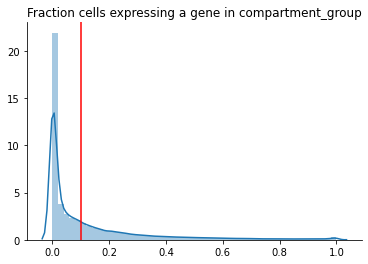

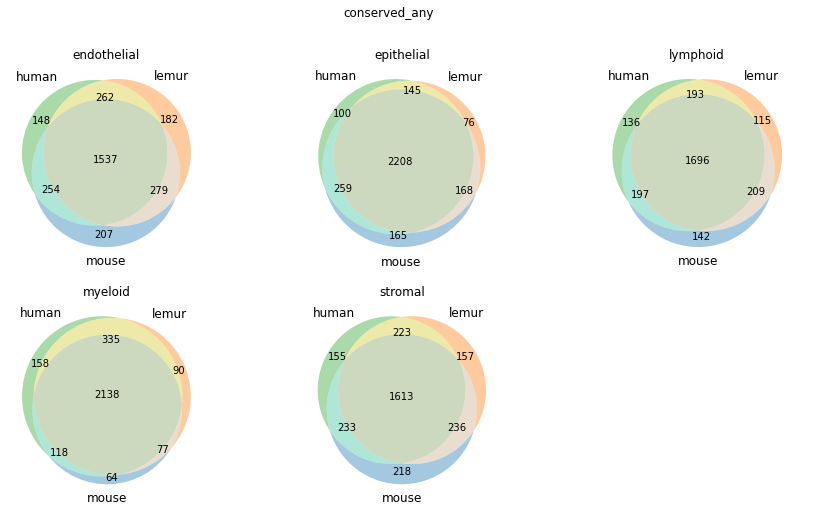

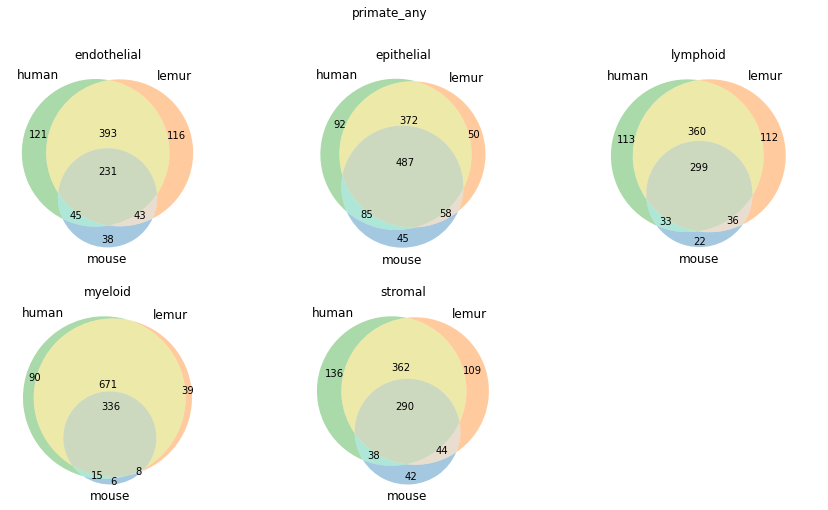

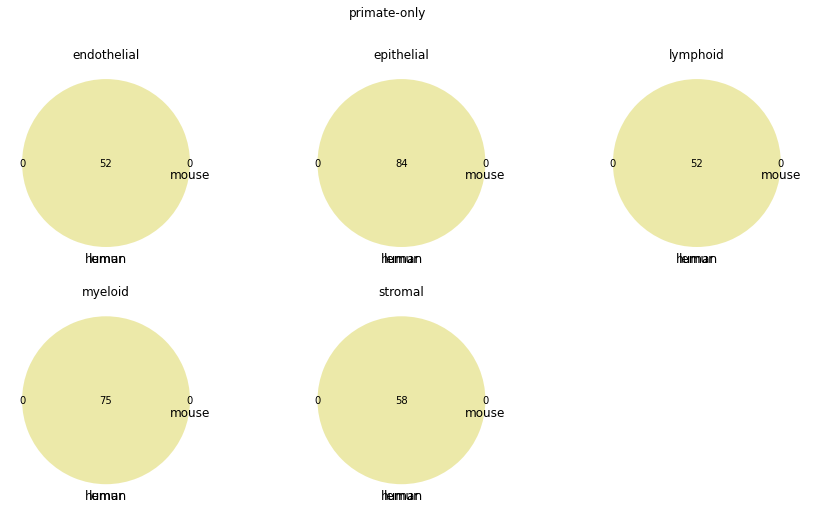

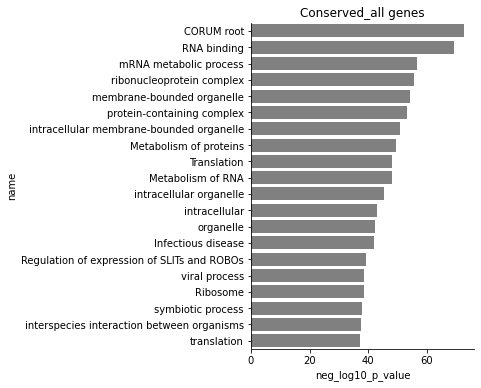

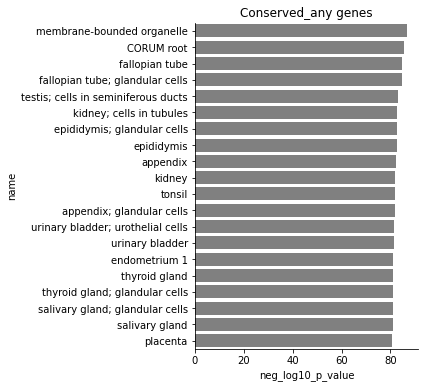

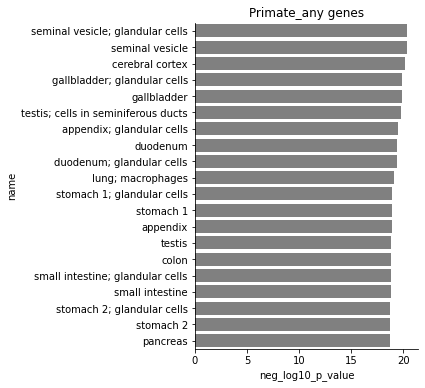

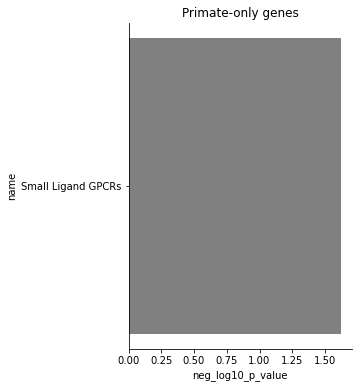

In [9]:
primate = binarized.BinarizedPrimateAnalyses(adata, groupby, species, 
                                              stable_genes=stability.stable_gene_names, debug=True)
primate.find_primate_enriched_genes()

In [10]:
3545 + 1337 + 3198 + 667

8747

### Venn diagrams of conserved vs primate

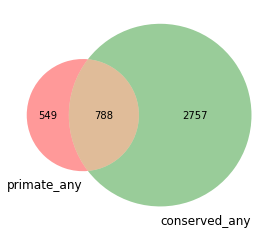

In [11]:
set_list = [set(primate.primate_any.index), set(primate.conserved_any.index)]
labels = ['primate_any', 'conserved_any']

matplotlib_venn.venn2(set_list, set_labels=labels)

In [12]:
has_mouse = primate.species_sharing_2d.applymap(lambda x: 'mouse' in x if isinstance(x, str) else x)
rows = has_mouse.any(axis=1)
mouse_any = primate.species_sharing_2d.loc[rows]
print(mouse_any.shape)
mouse_any.head()

(4897, 5)


compartment_group,endothelial,epithelial,lymphoid,myeloid,stromal
NOC2L,human,human-lemur-mouse,human-lemur-mouse,human-lemur-mouse,human
ISG15,human-lemur-mouse,human-lemur,human-lemur-mouse,human-lemur-mouse,human-lemur
TNFRSF18,lemur,NaN,human-lemur-mouse,NaN,NaN
SDF4,human-lemur-mouse,human-lemur-mouse,human-lemur-mouse,human-lemur-mouse,human-lemur-mouse
UBE2J2,human-mouse,human-mouse,human-mouse,human-mouse,human-mouse


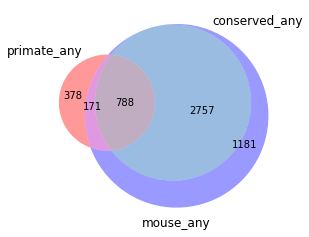

In [13]:
set_list = [set(primate.primate_any.index), set(primate.conserved_any.index), set(mouse_any.index)]
labels = ['primate_any', 'conserved_any', 'mouse_any']

matplotlib_venn.venn3(set_list, set_labels=labels)

In [14]:
len(primate.primate_any.index.intersection(primate.primate_all.index))

137

In [15]:
len(primate.primate_any.index.intersection(primate.conserved_any.index))

788

In [16]:
# compartment_primate.dotplot("HHIP")

In [17]:
rows = ((primate.species_sharing_2d == 'human-lemur') | primate.species_sharing_2d.isnull()).all(axis=1)
df = primate.species_sharing_2d.loc[rows]
df = df.dropna(how='all')
df

compartment_group,endothelial,epithelial,lymphoid,myeloid,stromal
TNFRSF25,NaN,NaN,human-lemur,NaN,NaN
ALPL,NaN,human-lemur,NaN,NaN,NaN
PTAFR,NaN,NaN,NaN,human-lemur,NaN
FAM167B,human-lemur,NaN,NaN,NaN,NaN
COL9A2,NaN,NaN,NaN,human-lemur,NaN
...,...,...,...,...,...
SHROOM4,human-lemur,NaN,NaN,NaN,NaN
GLA,human-lemur,human-lemur,human-lemur,human-lemur,human-lemur
TCEAL7,NaN,NaN,NaN,NaN,human-lemur
CD40LG,NaN,NaN,human-lemur,NaN,NaN


### Plot all-conserved or all-primate, groupby source

In [18]:
primate.do_go_enrichment(groupby_source=True, write=True)

-- /home/olga/code/tabula-microcebus--olgabot/xspecies-lung-de-within-species/notebooks/binarized.py --
2020-06-05 09:30:25,817 INFO: Wrote:
/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/binarized/binarized_expression__stable_genes__conserved_all__compartment_group__functional_enrichment.csv
-- /home/olga/code/tabula-microcebus--olgabot/xspecies-lung-de-within-species/notebooks/binarized.py --
2020-06-05 09:30:28,440 INFO: Wrote:
/home/olga/googledrive/TabulaMicrocebus/data/cross-species/binarized/binarized_expression__stable_genes__conserved_all__compartment_group__functional_enrichment.csv
-- /home/olga/code/tabula-microcebus--olgabot/xspecies-lung-de-within-species/notebooks/binarized.py --
2020-06-05 09:30:55,893 INFO: Wrote:
/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/binarized/binarized_expression__stable_genes__conserved_any__compartment_group__functional_enrichment.csv
-- /home/olga/code/tabula-microcebus--olgabot/

### Do per-compartment enrichment, overall

In [19]:
# compartment_primate.do_per_group_enrichment()

### Do per-compartment enrichment, per-source

In [ ]:
primate.do_per_group_enrichment(groupby_source=True, write=True)

# End of notebook